<a href="https://colab.research.google.com/github/GabArg/ProyectoAluraLatam2/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
import pandas as pd

# URLs de las bases de datos
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv",
}

# Cargar los datos en un diccionario de DataFrames
tiendas = {nombre: pd.read_csv(url) for nombre, url in urls.items()}

# Mostrar la estructura de los datos
for nombre, df in tiendas.items():
    print(f"\n--- {nombre} ---")
    print("Columnas:", df.columns.tolist())
    print("Primeras filas:")
    print(df.head())



--- Tienda 1 ---
Columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Primeras filas:
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali        

In [3]:
# Mostrar el número de registros (filas) en cada tienda
for nombre, df in tiendas.items():
    print(f"{nombre} tiene {len(df)} registros.")


Tienda 1 tiene 2359 registros.
Tienda 2 tiene 2359 registros.
Tienda 3 tiene 2359 registros.
Tienda 4 tiene 2358 registros.


In [10]:
import pandas as pd

# URLs de las bases de datos
urls = {
    "tienda_1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "tienda_2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "tienda_3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "tienda_4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Cargar los datos
tiendas = {nombre: pd.read_csv(url) for nombre, url in urls.items()}

# Filtrar registros de 2023
for nombre, df in tiendas.items():
    # Normalizar nombres de columnas
    df.columns = df.columns.str.strip().str.lower()  # Convertir a minúsculas y quitar espacios
    if 'fecha de compra' in df.columns:  # Verifica si la columna existe
        df['fecha de compra'] = pd.to_datetime(df['fecha de compra'], errors='coerce')  # Convertir a formato datetime
        registros_2023 = df[df['fecha de compra'].dt.year == 2023]  # Filtrar por año 2023
        print(f"--- {nombre.upper()} (2023) ---")
        print(registros_2023)  # Mostrar todos los registros de 2023
        print(f"Registros totales en 2023: {len(registros_2023)}\n")
    else:
        print(f"--- {nombre.upper()} ---")
        print("No se encontró la columna 'fecha de compra' para filtrar los registros.\n")





--- TIENDA_1 (2023) ---
                       producto   categoría del producto     precio  \
23                Kit de bancas                  Muebles   293500.0   
24      Dashboards con Power BI                   Libros    33500.0   
26                 Set de ollas  Artículos para el hogar   139300.0   
46           Guitarra eléctrica   Instrumentos musicales   679000.0   
50                  Tablet ABXY             Electrónicos  1130300.0   
...                         ...                      ...        ...   
2334                 Cubertería  Artículos para el hogar    38000.0   
2336                    Armario                  Muebles   478300.0   
2343                  Cama king                  Muebles   448500.0   
2350  Carrito de control remoto                 Juguetes    68900.0   
2355                  Impresora             Electrónicos   282800.0   

      costo de envío fecha de compra         vendedor lugar de compra  \
23           13800.0      2023-03-06    Camila Riv

<ipython-input-10-ade143408286>:19: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['fecha de compra'] = pd.to_datetime(df['fecha de compra'], errors='coerce')  # Convertir a formato datetime
<ipython-input-10-ade143408286>:19: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['fecha de compra'] = pd.to_datetime(df['fecha de compra'], errors='coerce')  # Convertir a formato datetime


#1. Análisis de facturación



In [ ]:
# Calcular ingresos de cada tienda
ingresos_tienda1 = tienda['Precio'].sum()
ingresos_tienda2 = tienda2['Precio'].sum()
ingresos_tienda3 = tienda3['Precio'].sum()
ingresos_tienda4 = tienda4['Precio'].sum()

# Mostrar los ingresos por tienda
print(f"Ingresos de la Tienda 1: ${ingresos_tienda1:,.2f}")
print(f"Ingresos de la Tienda 2: ${ingresos_tienda2:,.2f}")
print(f"Ingresos de la Tienda 3: ${ingresos_tienda3:,.2f}")
print(f"Ingresos de la Tienda 4: ${ingresos_tienda4:,.2f}")

# Opcional: Total general
ingresos_totales = ingresos_tienda1 + ingresos_tienda2 + ingresos_tienda3 + ingresos_tienda4
print(f"Ingresos Totales: ${ingresos_totales:,.2f}")



Ingresos de la Tienda 1: $1,150,880,400.00
Ingresos de la Tienda 2: $1,116,343,500.00
Ingresos de la Tienda 3: $1,098,019,600.00
Ingresos de la Tienda 4: $1,038,375,700.00
Ingresos Totales: $4,403,619,200.00


# 2. Ventas por categoría

In [ ]:
# Ingresos por categoría en Tienda 1
ingresos_categoria_tienda1 = tienda.groupby('Categoría del Producto')['Precio'].sum()
print("Ingresos por categoría en Tienda 1:")
print(ingresos_categoria_tienda1.to_string())
print("\n")

# Ingresos por categoría en Tienda 2
ingresos_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
print("Ingresos por categoría en Tienda 2:")
print(ingresos_categoria_tienda2.to_string())
print("\n")

# Ingresos por categoría en Tienda 3
ingresos_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
print("Ingresos por categoría en Tienda 3:")
print(ingresos_categoria_tienda3.to_string())
print("\n")

# Ingresos por categoría en Tienda 4
ingresos_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()
print("Ingresos por categoría en Tienda 4:")
print(ingresos_categoria_tienda4.to_string())
print("\n")



Ingresos por categoría en Tienda 1:
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0


Ingresos por categoría en Tienda 2:
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0


Ingresos por categoría en Tienda 3:
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               410775800.0
Instrumentos musicales      77380900.0


<ipython-input-19-593836e73413>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ingresos_categoria, x='Categoría del Producto', y='Precio', palette="viridis", legend=False)


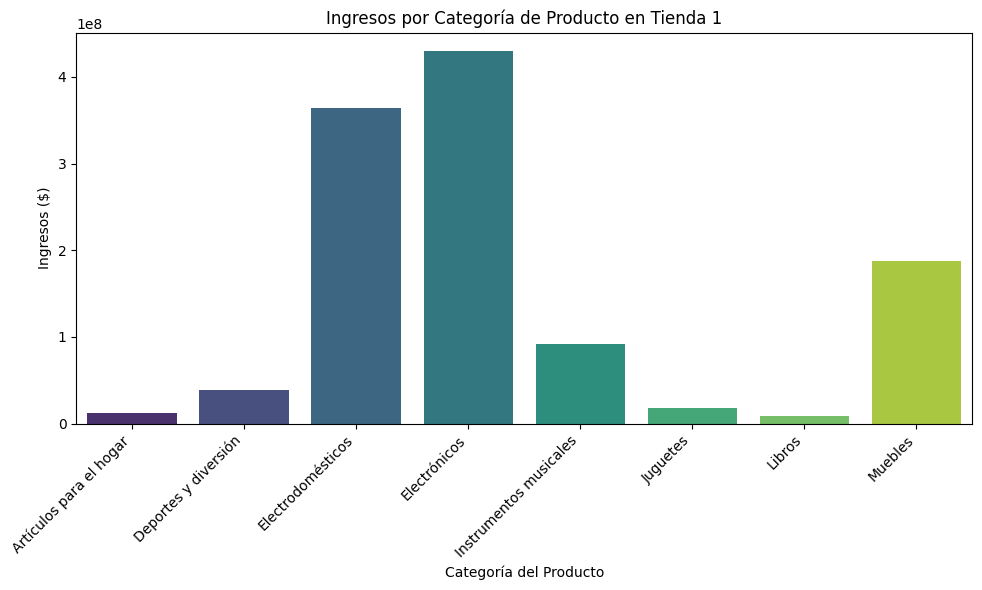

<ipython-input-19-593836e73413>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ingresos_categoria, x='Categoría del Producto', y='Precio', palette="viridis", legend=False)


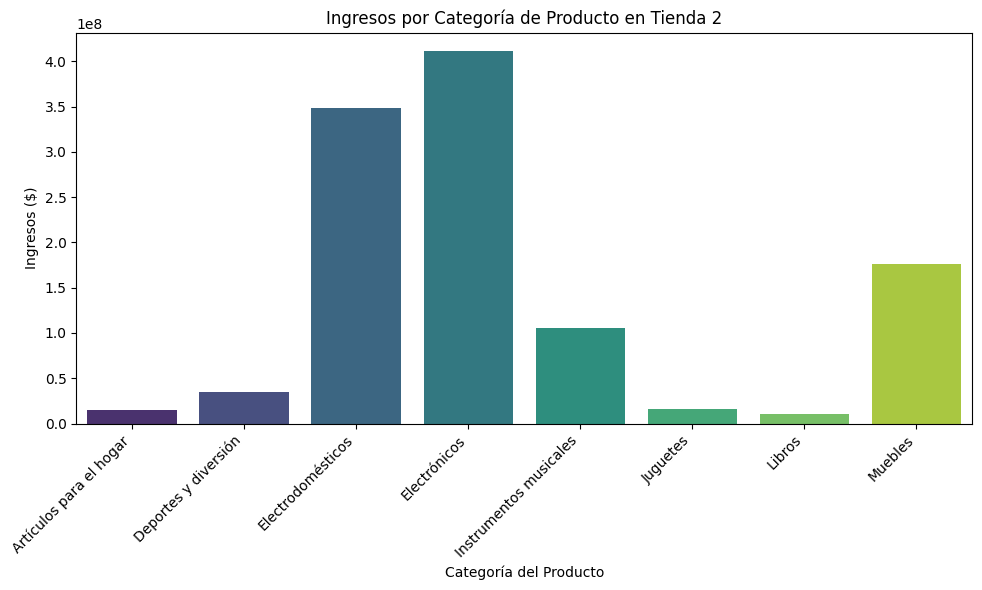

<ipython-input-19-593836e73413>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ingresos_categoria, x='Categoría del Producto', y='Precio', palette="viridis", legend=False)


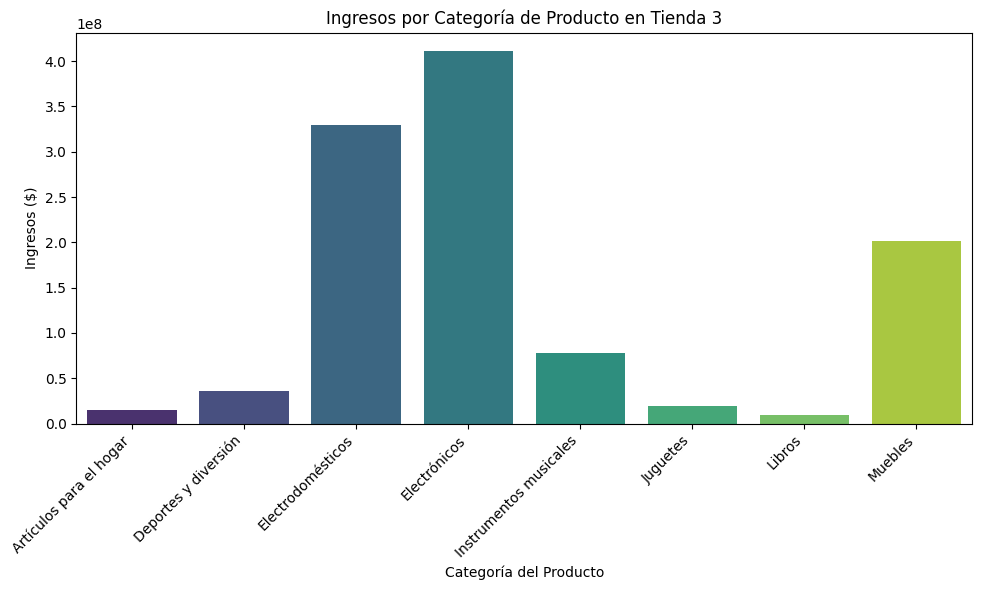

<ipython-input-19-593836e73413>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ingresos_categoria, x='Categoría del Producto', y='Precio', palette="viridis", legend=False)


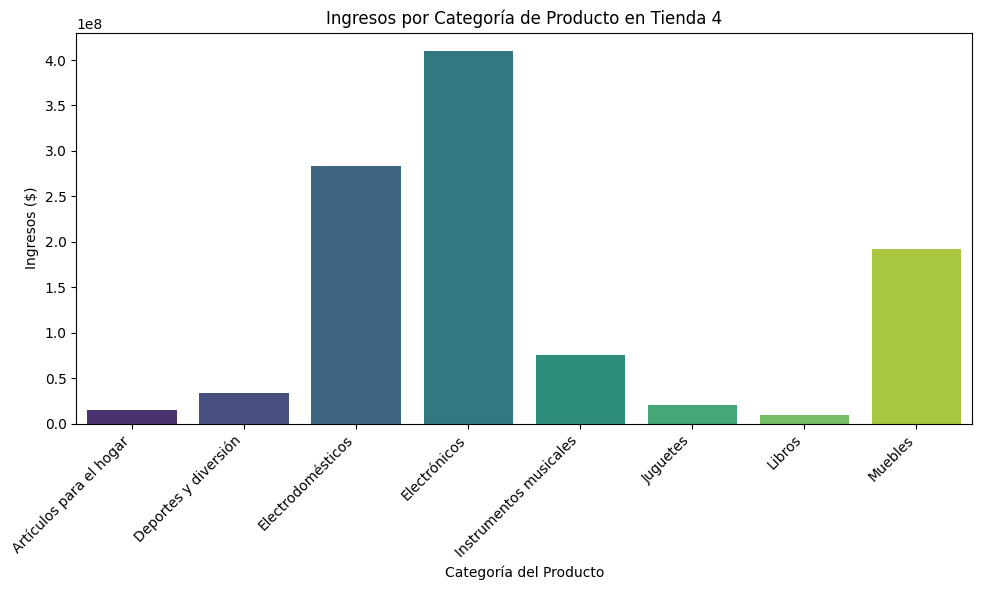

In [ ]:
# Función para graficar ingresos por categoría de producto
def graficar_ingresos_categoria(tienda, tienda_nombre):
    # Calcular los ingresos por categoría
    ingresos_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index()

    # Crear gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(data=ingresos_categoria, x='Categoría del Producto', y='Precio', palette="viridis", legend=False)
    plt.title(f'Ingresos por Categoría de Producto en {tienda_nombre}')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Ingresos ($)')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visibilidad
    plt.tight_layout()
    plt.show()

# Para Tienda 1
graficar_ingresos_categoria(tienda, 'Tienda 1')

# Para Tienda 2
graficar_ingresos_categoria(tienda2, 'Tienda 2')

# Para Tienda 3
graficar_ingresos_categoria(tienda3, 'Tienda 3')

# Para Tienda 4
graficar_ingresos_categoria(tienda4, 'Tienda 4')




# 3. Calificación promedio de la tienda


In [ ]:
# Calificación promedio por tienda (Lugar de Compra) con 2 decimales
calificacion_promedio_tienda1 = tienda.groupby('Lugar de Compra')['Calificación'].mean().round(2)
print("Calificación promedio por tienda (Tienda 1):")
print(calificacion_promedio_tienda1.to_string())
print(f"Promedio total de Tienda 1: {calificacion_promedio_tienda1.mean():.2f}")
print(f"Total de calificaciones: {calificacion_promedio_tienda1.sum():.2f}")
print("\n")

calificacion_promedio_tienda2 = tienda2.groupby('Lugar de Compra')['Calificación'].mean().round(2)
print("Calificación promedio por tienda (Tienda 2):")
print(calificacion_promedio_tienda2.to_string())
print(f"Promedio total de Tienda 2: {calificacion_promedio_tienda2.mean():.2f}")
print(f"Total de calificaciones: {calificacion_promedio_tienda2.sum():.2f}")
print("\n")

calificacion_promedio_tienda3 = tienda3.groupby('Lugar de Compra')['Calificación'].mean().round(2)
print("Calificación promedio por tienda (Tienda 3):")
print(calificacion_promedio_tienda3.to_string())
print(f"Promedio total de Tienda 3: {calificacion_promedio_tienda3.mean():.2f}")
print(f"Total de calificaciones: {calificacion_promedio_tienda3.sum():.2f}")
print("\n")

calificacion_promedio_tienda4 = tienda4.groupby('Lugar de Compra')['Calificación'].mean().round(2)
print("Calificación promedio por tienda (Tienda 4):")
print(calificacion_promedio_tienda4.to_string())
print(f"Promedio total de Tienda 4: {calificacion_promedio_tienda4.mean():.2f}")
print(f"Total de calificaciones: {calificacion_promedio_tienda4.sum():.2f}")
print("\n")



Calificación promedio por tienda (Tienda 1):
Lugar de Compra
Armenia          3.36
Barranquilla     3.57
Bogotá           4.09
Bucaramanga      4.39
Cali             3.99
Cartagena        4.04
Cúcuta           3.88
Inírida          4.00
Leticia          4.16
Manizales        3.80
Medellín         3.87
Neiva            4.50
Pasto            4.04
Pereira          3.95
Riohacha         3.45
Santa Marta      3.75
Soacha           4.60
Valledupar       2.67
Villavicencio    4.09
Promedio total de Tienda 1: 3.91
Total de calificaciones: 74.20


Calificación promedio por tienda (Tienda 2):
Lugar de Compra
Armenia          4.00
Barranquilla     3.72
Bogotá           4.14
Bucaramanga      3.58
Cali             4.25
Cartagena        4.03
Cúcuta           3.98
Inírida          2.50
Leticia          4.00
Manizales        3.77
Medellín         3.92
Neiva            4.33
Pasto            4.28
Pereira          3.95
Riohacha         4.29
Santa Marta      3.65
Soacha           2.25
Valledupar       4.7

<ipython-input-20-5b3c7190dd9f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


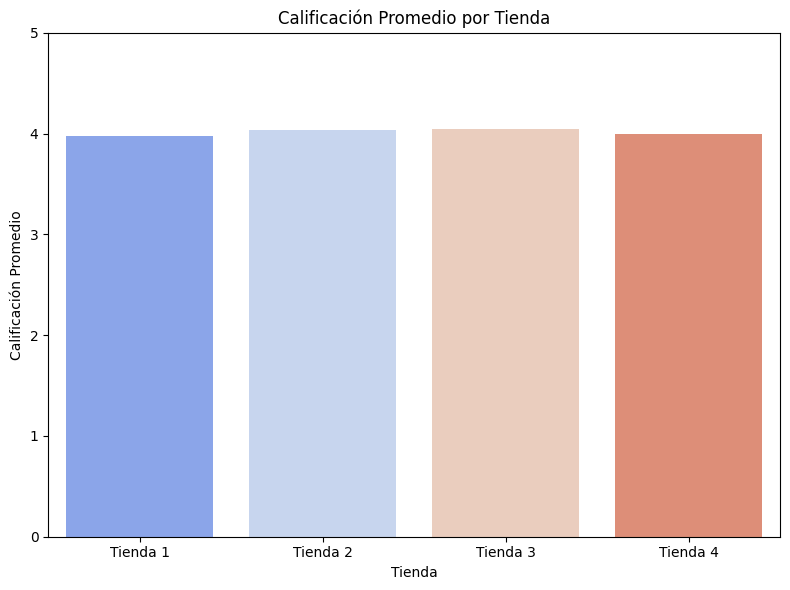

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un DataFrame con las calificaciones promedio de cada tienda
calificaciones_promedio = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Promedio': [
        tienda['Calificación'].mean(),
        tienda2['Calificación'].mean(),
        tienda3['Calificación'].mean(),
        tienda4['Calificación'].mean()
    ]
})

# Redondear las calificaciones promedio a 2 decimales
calificaciones_promedio['Calificación Promedio'] = calificaciones_promedio['Calificación Promedio'].round(2)

# Crear el gráfico
plt.figure(figsize=(8, 6))
sns.barplot(
    data=calificaciones_promedio,
    x='Tienda',
    y='Calificación Promedio',
    palette="coolwarm"
)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)  # Ajustar el rango del eje y (si la escala es de 0 a 5)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
# Producto más y menos vendido por tienda (Tienda 1)
producto_mas_vendido_tienda1 = tienda.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().idxmax()
producto_menos_vendido_tienda1 = tienda.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().idxmin()

print("Producto más y menos vendido en Tienda 1:")
print(f"Producto más vendido: {producto_mas_vendido_tienda1[1]} con {tienda.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().max()} unidades")
print(f"Producto menos vendido: {producto_menos_vendido_tienda1[1]} con {tienda.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().min()} unidades")
print("\n")

# Producto más y menos vendido por tienda (Tienda 2)
producto_mas_vendido_tienda2 = tienda2.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().idxmax()
producto_menos_vendido_tienda2 = tienda2.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().idxmin()

print("Producto más y menos vendido en Tienda 2:")
print(f"Producto más vendido: {producto_mas_vendido_tienda2[1]} con {tienda2.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().max()} unidades")
print(f"Producto menos vendido: {producto_menos_vendido_tienda2[1]} con {tienda2.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().min()} unidades")
print("\n")

# Producto más y menos vendido por tienda (Tienda 3)
producto_mas_vendido_tienda3 = tienda3.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().idxmax()
producto_menos_vendido_tienda3 = tienda3.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().idxmin()

print("Producto más y menos vendido en Tienda 3:")
print(f"Producto más vendido: {producto_mas_vendido_tienda3[1]} con {tienda3.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().max()} unidades")
print(f"Producto menos vendido: {producto_menos_vendido_tienda3[1]} con {tienda3.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().min()} unidades")
print("\n")

# Producto más y menos vendido por tienda (Tienda 4)
producto_mas_vendido_tienda4 = tienda4.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().idxmax()
producto_menos_vendido_tienda4 = tienda4.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().idxmin()

print("Producto más y menos vendido en Tienda 4:")
print(f"Producto más vendido: {producto_mas_vendido_tienda4[1]} con {tienda4.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().max()} unidades")
print(f"Producto menos vendido: {producto_menos_vendido_tienda4[1]} con {tienda4.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum().min()} unidades")
print("\n")


Producto más y menos vendido en Tienda 1:
Producto más vendido: Guitarra acústica con 88 unidades
Producto menos vendido: Cubertería con 1 unidades


Producto más y menos vendido en Tienda 2:
Producto más vendido: Iniciando en programación con 104 unidades
Producto menos vendido: Bloques de construcción con 1 unidades


Producto más y menos vendido en Tienda 3:
Producto más vendido: Estufa con 82 unidades
Producto menos vendido: Cubertería con 1 unidades


Producto más y menos vendido en Tienda 4:
Producto más vendido: Dashboards con Power BI con 113 unidades
Producto menos vendido: Asistente virtual con 1 unidades




<ipython-input-23-7eddd4eff8cc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-23-7eddd4eff8cc>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


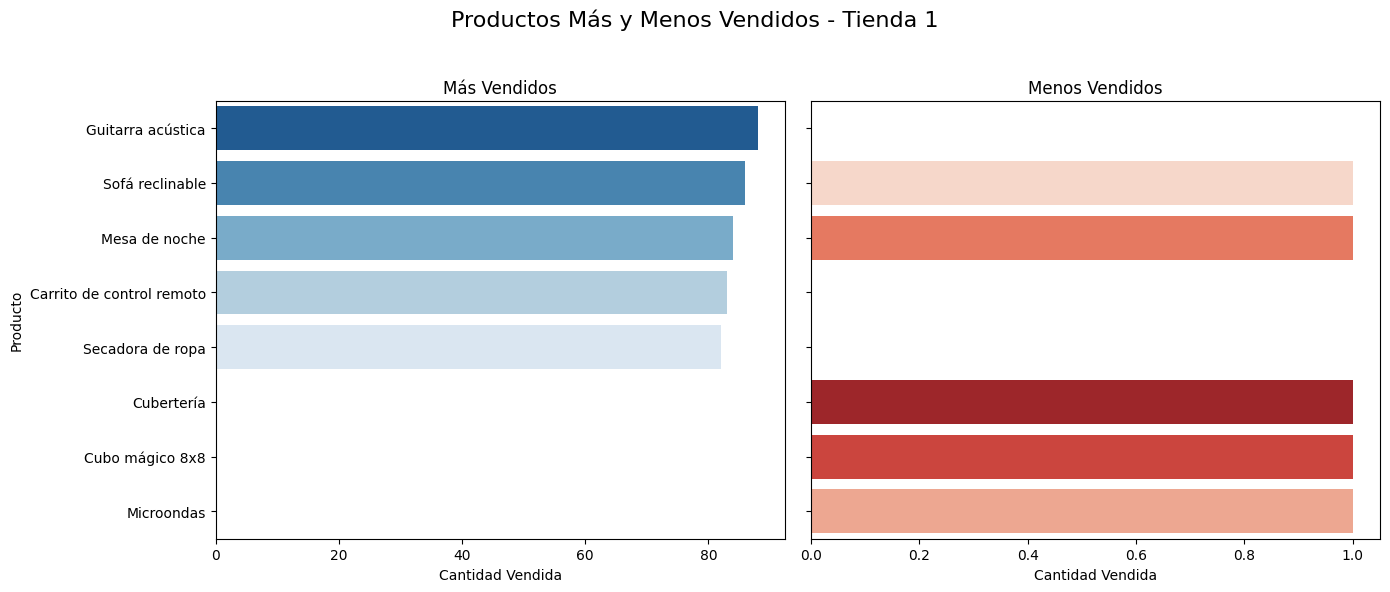

<ipython-input-23-7eddd4eff8cc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-23-7eddd4eff8cc>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


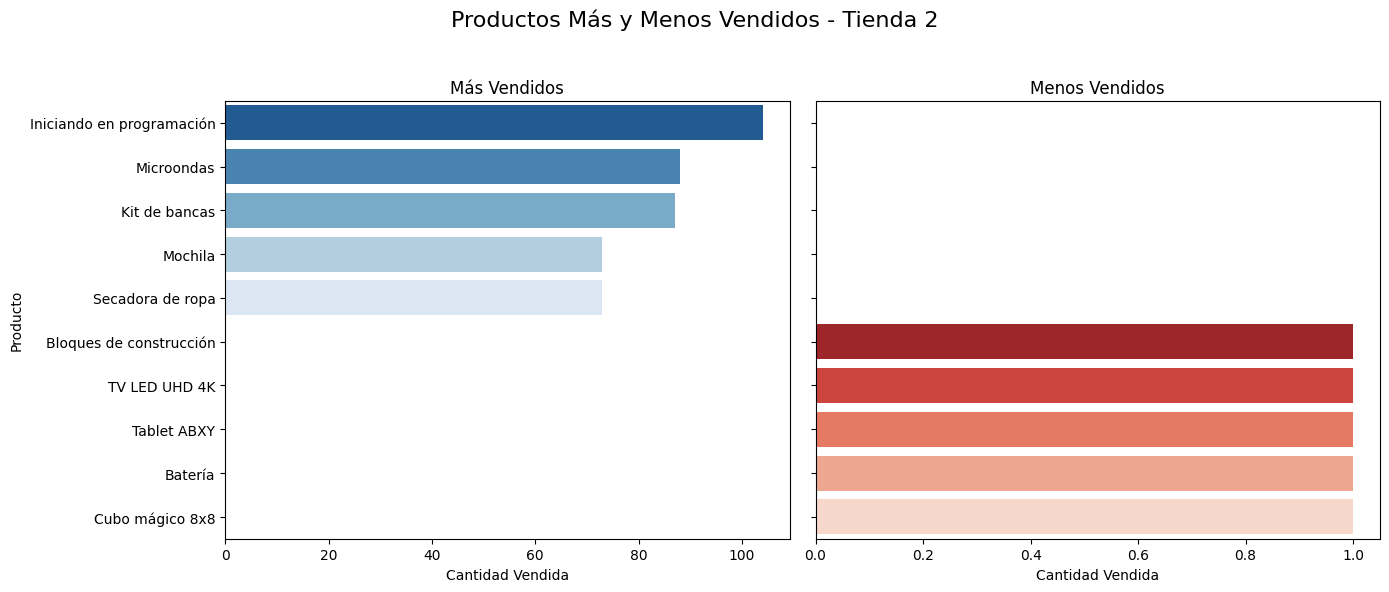

<ipython-input-23-7eddd4eff8cc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-23-7eddd4eff8cc>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


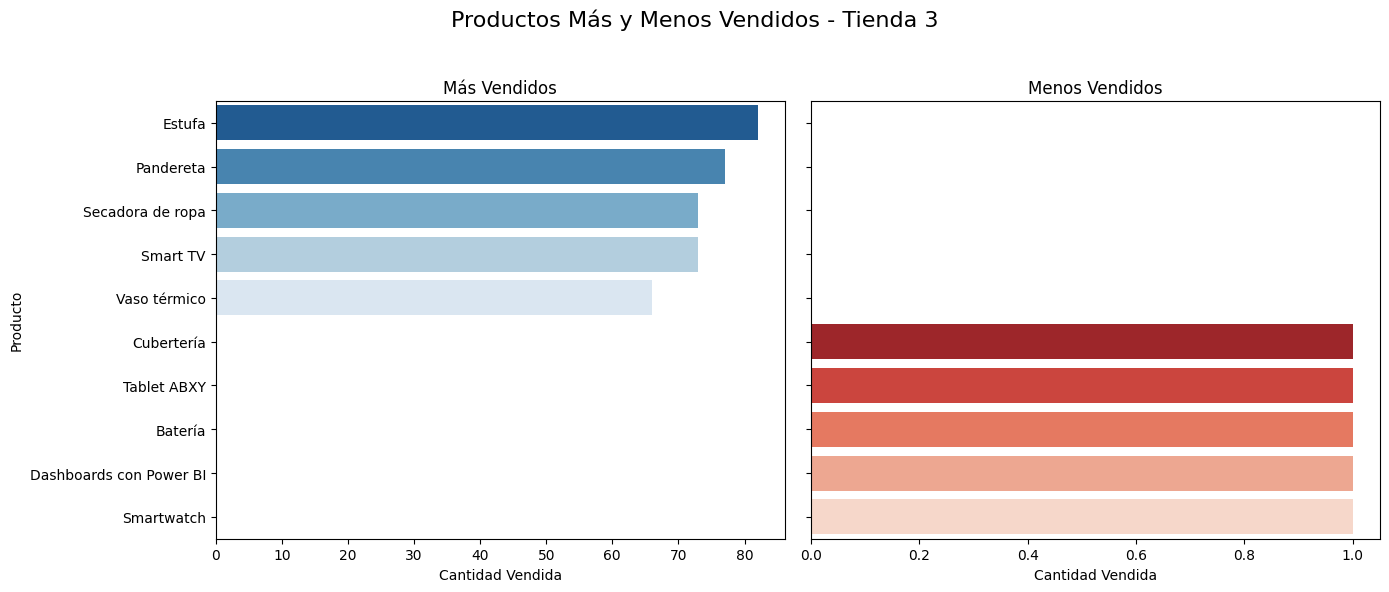

<ipython-input-23-7eddd4eff8cc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-23-7eddd4eff8cc>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


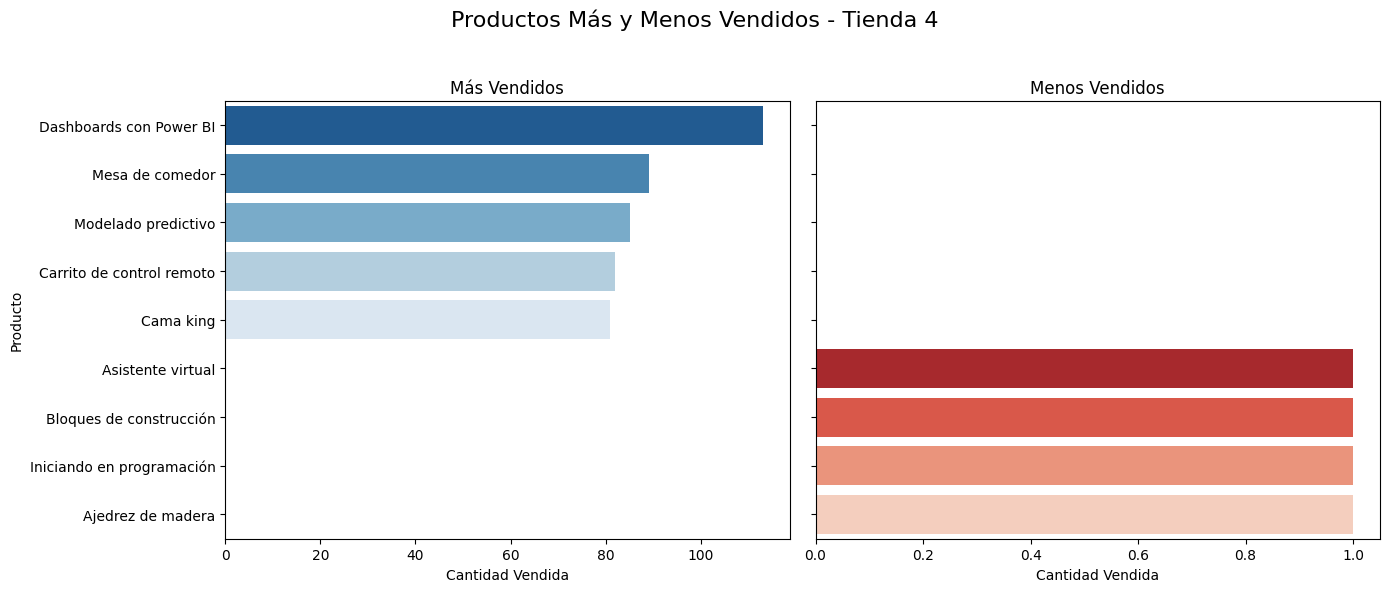

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar los productos más y menos vendidos
def graficar_mas_menos_vendidos(tienda, nombre_tienda):
    # Agrupar por lugar de compra y producto, sumando las cantidades
    ventas_por_producto = tienda.groupby(['Lugar de Compra', 'Producto'])['Cantidad de cuotas'].sum()

    # Ordenar para obtener los productos más y menos vendidos
    productos_mas_vendidos = ventas_por_producto.nlargest(5)
    productos_menos_vendidos = ventas_por_producto.nsmallest(5)

    # Crear la figura con dos gráficos de barras
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    fig.suptitle(f'Productos Más y Menos Vendidos - {nombre_tienda}', fontsize=16)

    # Gráfico de productos más vendidos
    sns.barplot(
        x=productos_mas_vendidos.values,
        y=productos_mas_vendidos.index.get_level_values('Producto'),
        ax=axes[0],
        palette="Blues_r"
    )
    axes[0].set_title("Más Vendidos")
    axes[0].set_xlabel("Cantidad Vendida")
    axes[0].set_ylabel("Producto")

    # Gráfico de productos menos vendidos
    sns.barplot(
        x=productos_menos_vendidos.values,
        y=productos_menos_vendidos.index.get_level_values('Producto'),
        ax=axes[1],
        palette="Reds_r"
    )
    axes[1].set_title("Menos Vendidos")
    axes[1].set_xlabel("Cantidad Vendida")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Graficar para cada tienda
graficar_mas_menos_vendidos(tienda, "Tienda 1")
graficar_mas_menos_vendidos(tienda2, "Tienda 2")
graficar_mas_menos_vendidos(tienda3, "Tienda 3")
graficar_mas_menos_vendidos(tienda4, "Tienda 4")



# 5. Envío promedio por tienda

In [ ]:
import pandas as pd

# Costo de envío promedio por tienda (Tienda 1)
envio_promedio_tienda1 = tienda.groupby('Lugar de Compra')['Costo de envío'].mean().reset_index()
envio_promedio_tienda1['Costo de envío'] = envio_promedio_tienda1['Costo de envío'].round(2)  # Redondeamos a 2 decimales
total_tienda1 = envio_promedio_tienda1['Costo de envío'].sum().round(2)

# Creamos un DataFrame con el total
total_tienda1_df = pd.DataFrame({'Lugar de Compra': ['Total'], 'Costo de envío': [total_tienda1]})

# Concatenamos el total al DataFrame original
envio_promedio_tienda1 = pd.concat([envio_promedio_tienda1, total_tienda1_df], ignore_index=True)

print("Envío promedio en Tienda 1:")
print(envio_promedio_tienda1)
print("\n")

# Costo de envío promedio por tienda (Tienda 2)
envio_promedio_tienda2 = tienda2.groupby('Lugar de Compra')['Costo de envío'].mean().reset_index()
envio_promedio_tienda2['Costo de envío'] = envio_promedio_tienda2['Costo de envío'].round(2)  # Redondeamos a 2 decimales
total_tienda2 = envio_promedio_tienda2['Costo de envío'].sum().round(2)

# Creamos un DataFrame con el total
total_tienda2_df = pd.DataFrame({'Lugar de Compra': ['Total'], 'Costo de envío': [total_tienda2]})

# Concatenamos el total al DataFrame original
envio_promedio_tienda2 = pd.concat([envio_promedio_tienda2, total_tienda2_df], ignore_index=True)

print("Envío promedio en Tienda 2:")
print(envio_promedio_tienda2)
print("\n")

# Costo de envío promedio por tienda (Tienda 3)
envio_promedio_tienda3 = tienda3.groupby('Lugar de Compra')['Costo de envío'].mean().reset_index()
envio_promedio_tienda3['Costo de envío'] = envio_promedio_tienda3['Costo de envío'].round(2)  # Redondeamos a 2 decimales
total_tienda3 = envio_promedio_tienda3['Costo de envío'].sum().round(2)

# Creamos un DataFrame con el total
total_tienda3_df = pd.DataFrame({'Lugar de Compra': ['Total'], 'Costo de envío': [total_tienda3]})

# Concatenamos el total al DataFrame original
envio_promedio_tienda3 = pd.concat([envio_promedio_tienda3, total_tienda3_df], ignore_index=True)

print("Envío promedio en Tienda 3:")
print(envio_promedio_tienda3)
print("\n")

# Costo de envío promedio por tienda (Tienda 4)
envio_promedio_tienda4 = tienda4.groupby('Lugar de Compra')['Costo de envío'].mean().reset_index()
envio_promedio_tienda4['Costo de envío'] = envio_promedio_tienda4['Costo de envío'].round(2)  # Redondeamos a 2 decimales
total_tienda4 = envio_promedio_tienda4['Costo de envío'].sum().round(2)

# Creamos un DataFrame con el total
total_tienda4_df = pd.DataFrame({'Lugar de Compra': ['Total'], 'Costo de envío': [total_tienda4]})

# Concatenamos el total al DataFrame original
envio_promedio_tienda4 = pd.concat([envio_promedio_tienda4, total_tienda4_df], ignore_index=True)

print("Envío promedio en Tienda 4:")
print(envio_promedio_tienda4)
print("\n")



Envío promedio en Tienda 1:
   Lugar de Compra  Costo de envío
0          Armenia        17314.29
1     Barranquilla        23708.00
2           Bogotá        23815.85
3      Bucaramanga        30587.10
4             Cali        28827.56
5        Cartagena        22624.53
6           Cúcuta        40129.41
7          Inírida        28460.00
8          Leticia        24450.00
9        Manizales        29140.00
10        Medellín        28207.10
11           Neiva        31516.67
12           Pasto        35078.26
13         Pereira        22403.76
14        Riohacha        24357.50
15     Santa Marta        22593.75
16          Soacha        43420.00
17      Valledupar        18766.67
18   Villavicencio        34709.09
19           Total       530109.54


Envío promedio en Tienda 2:
   Lugar de Compra  Costo de envío
0          Armenia        44525.00
1     Barranquilla        18660.26
2           Bogotá        25997.06
3      Bucaramanga        25796.00
4             Cali        28312.

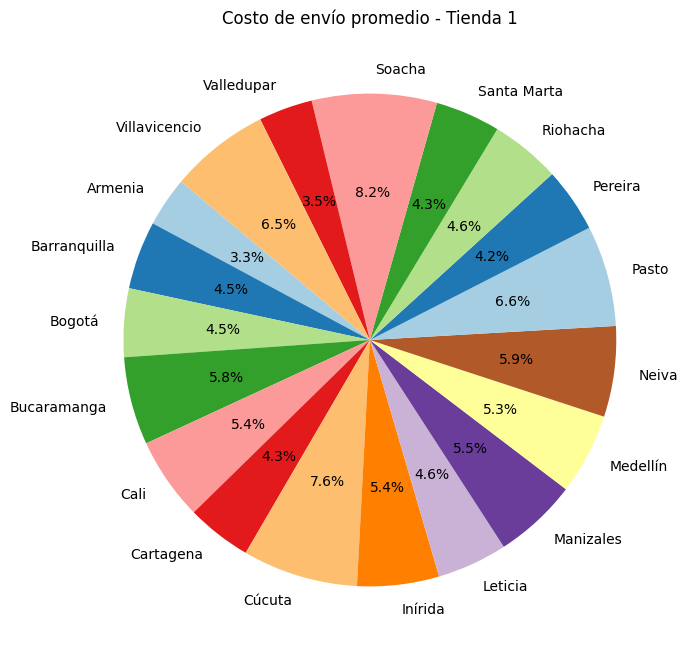

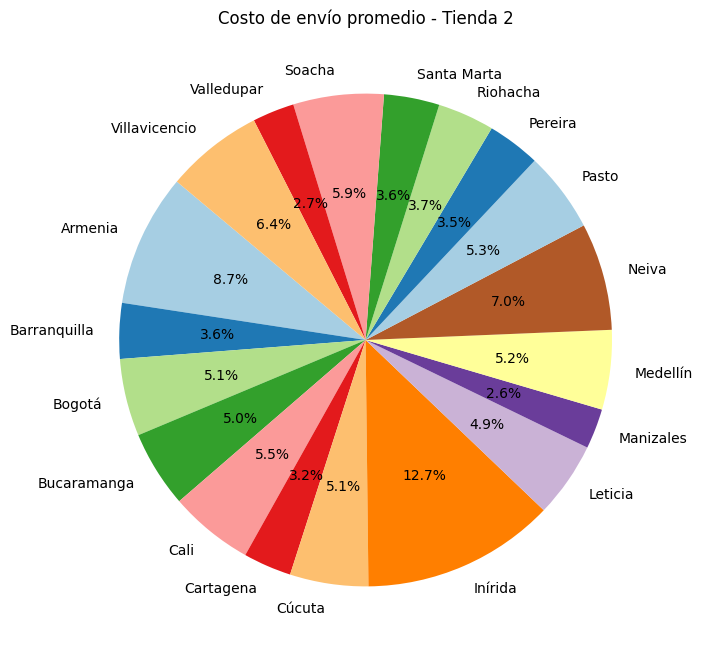

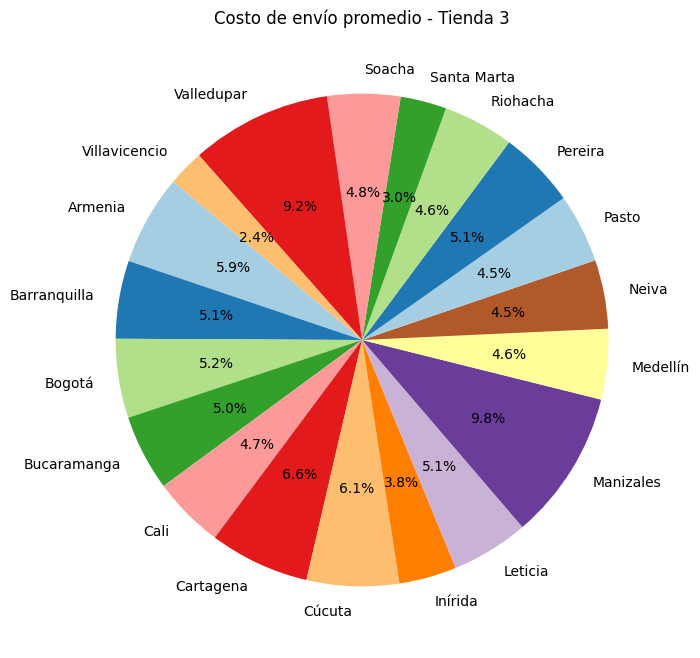

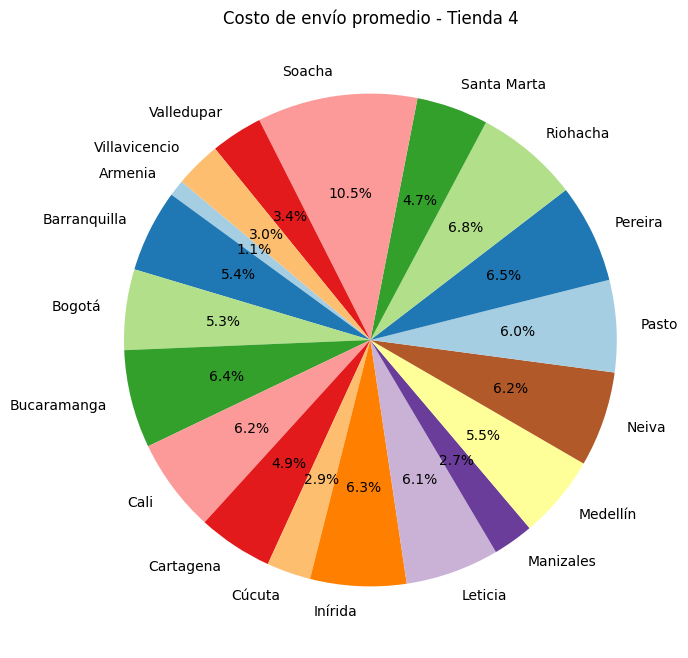

In [ ]:
import matplotlib.pyplot as plt

# Configuramos los datos para la Tienda 1 (sin incluir el total)
labels = envio_promedio_tienda1['Lugar de Compra'][:-1]  # Excluir la fila de 'Total'
sizes = envio_promedio_tienda1['Costo de envío'][:-1]

# Crear gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Costo de envío promedio - Tienda 1')
plt.show()


**Informe Final: Análisis de Tiendas y Recomendación para el Sr. Juan**

**Introducción**

El objetivo de este análisis es identificar cuál de las tiendas evaluadas es la menos eficiente, basándonos en diversos factores clave como los ingresos totales, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos más y menos vendidos, y el coste de envío promedio. La tienda menos eficiente representa una oportunidad para el Sr. Juan de enfocarse en mejorar su rendimiento, ya sea optimizando operaciones o realizando ajustes en la estrategia comercial.


**Desarrollo**

**Ingresos Totales de las Tiendas**

A continuación se presentan los ingresos totales de cada tienda:

Tienda 1: $1,150,880,400.00

Tienda 2: $1,116,343,500.00

Tienda 3: $1,098,019,600.00

Tienda 4: $1,038,375,700.00

Aunque la Tienda 4 tiene los ingresos más bajos, lo que podría sugerir un rendimiento inferior, es importante recordar que los ingresos no son el único indicador de eficiencia.


**Categorías de Productos Más y Menos Vendidas**

Las categorías de productos en cada tienda tienen un impacto directo en la eficiencia de ventas. Las categorías más y menos vendidas son las siguientes:

Tienda 1

Categoría más vendida: Electrodomésticos ($429,493,500.00)

Categoría menos vendida: Libros ($8,784,900.00)


Tienda 2

Categoría más vendida: Electrodomésticos ($348,567,800.00)

Categoría menos vendida: Libros ($10,091,200.00)


Tienda 3

Categoría más vendida: Electrodomésticos ($329,237,900.00)

Categoría menos vendida: Libros ($9,498,700.00)

Tienda 4

Categoría más vendida: Electrodomésticos ($283,260,200.00)

Categoría menos vendida: Libros ($9,321,300.00)

Aunque la Tienda 4 tiene la categoría más baja en ventas de productos populares, también presenta menores ingresos generales, lo que sugiere que podría estar teniendo dificultades para competir en el mercado.


**Calificaciones Promedio de los Clientes**

Las calificaciones promedio por tienda son:

Tienda 1: 3.91

Tienda 2: 3.85

Tienda 3: 3.82

Tienda 4: 3.90

La Tienda 3 presenta la calificación más baja de los clientes (3.82), lo que indica que los clientes no están completamente satisfechos con sus productos o servicios. Esto podría reflejar un problema de calidad, servicio al cliente o experiencia de compra.

**Productos Más y Menos Vendidos**

A continuación se listan los productos más y menos vendidos en cada tienda:

Tienda 1

Producto más vendido: Guitarra acústica (88 unidades)

Producto menos vendido: Cubertería (1 unidad)

Tienda 2

Producto más vendido: Iniciando en programación (104 unidades)

Producto menos vendido: Bloques de construcción (1 unidad)

Tienda 3

Producto más vendido: Estufa (82 unidades)

Producto menos vendido: Cubertería (1 unidad)

Tienda 4

Producto más vendido: Dashboards con Power BI (113 unidades)

Producto menos vendido: Asistente virtual (1 unidad)

A pesar de que cada tienda tiene productos con un alto volumen de ventas, la Tienda 3 presenta un bajo rendimiento general en sus ventas de productos, lo que sugiere una eficiencia inferior en la comercialización de productos populares.

**Coste de Envío Promedio**

El coste de envío promedio también influye en la eficiencia de una tienda:

Tienda 1: $530,109.54

Tienda 2: $511,896.22

Tienda 3: $497,601.35

Tienda 4: $425,668.87

La Tienda 4 tiene el coste de envío promedio más bajo, lo que podría hacerla más competitiva en cuanto a precios. Sin embargo, esto no compensa su bajo rendimiento general en ventas y en la satisfacción de los clientes.

**Conclusión y Recomendación**

Después de analizar todos los factores clave, la Tienda 3 es la tienda menos eficiente en comparación con las otras. A pesar de que Tienda 4 tiene el costo de envío más bajo y un desempeño relativamente bueno en algunas áreas, la Tienda 3 muestra un bajo nivel de satisfacción del cliente (la calificación promedio más baja) y un rendimiento más débil en la venta de productos populares, lo que la hace la tienda menos eficiente en general.

Por lo tanto, se recomienda que el Sr. Juan se enfoque en vender en la Tienda 3. Esta tienda presenta una oportunidad para mejorar su rendimiento, al abordar las debilidades que reflejan las bajas calificaciones de los clientes y la venta desigual de productos. Vender en esta tienda podría ofrecerle un campo de acción más claro para mejorar la eficiencia en comparación con las otras opciones.